In [2]:
# !pip install numpy
# !pip install pandas
# !pip install csv
# !pip install matplotlib
# !pip install seaborn
# !pip install tqdm

In [3]:
# !pip install --upgrade pip

Imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from data.read_data import *

Get dataframes

In [7]:
students = get_Students()
random_square_df = get_square_df()
random_rhombus_df = get_rhombus_df()
random_circle_df = get_circle_df()

In [8]:
def check_sorted(arr):
    for i in range(1, len(arr)):
        if arr[i][1] < arr[i-1][1]:
            print(i)
            return False
    return True

RSK algorithm

In [9]:
def insert_to_pile(element, pile):
    # enter element to the sorted array "pile", and return the next element
    low = 0
    high = len(pile)-1
    while low <= high: # binary search
        mid = (low+high)//2
        if pile[mid][1] <= element[1]:
            low = mid + 1
        else:
            high = mid - 1
    pile.insert(low, element) # insert element
    next_element = pile.pop(low + 1)  # remove and return the next element for RSK
    return next_element

In [10]:
def RSK(df):
    df = df.sort_values(by=df.columns[0])
    df = df.reset_index(drop = True)
    piles = []
    for i in tqdm(range(df.shape[0])):
        if not piles:
            piles.append([df.iloc[i]])
        else:
            flag = True
            element = df.iloc[i] # first element to add to piles
            for pile in piles:
                if element[1] >= pile[-1][1]:
                    pile.append(element)
                    flag = False
                    break
                else:
                    element = insert_to_pile(element, pile)
            if flag:
                piles.append([element])
    return piles       

In [16]:
def plot_piles(piles, filename, title):
    lists_lengths = [len(sublist) for sublist in piles]
    list_indices = range(len(piles))
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create a bar plot
    ax.bar(list_indices, lists_lengths, color='skyblue', edgecolor='lightblue', label='List Lengths')
    
    # Create a line plot
    ax.plot(list_indices, lists_lengths, color='blue', linestyle='-', label='Line Connects')
    
    # Set x-axis ticks to match list indices
    ax.set_xticks(list_indices)
    
    # Set labels and title
    ax.set_xticks(range(0, len(piles), 100))
    ax.set_xlabel('Pile Number')
    ax.set_ylabel('Length of Piles')
    ax.set_title('RSK Algorithm - ' + title )
    ax.grid(False)
    plt.savefig("plots/png/RSK_"+ filename +".png") # save as png
    plt.savefig("plots/pdf/RSK_"+ filename +".pdf") # save as pdf
    
    plt.show()

Performing RSK on different datasets

In [14]:
piles = RSK(students) # get real students piles

100%|██████████| 136939/136939 [14:58<00:00, 152.35it/s]


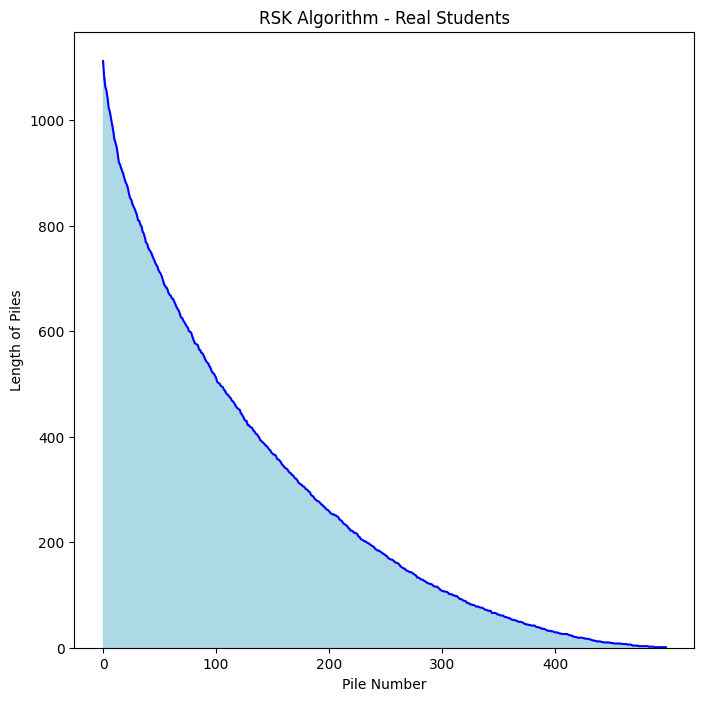

In [17]:
plot_piles(piles,"real_students" ,"Real Students") # plot the piles

In [ ]:
random_square_piles = RSK(random_square_df) # get random square piles

In [ ]:
plot_piles(random_square_piles, "random_square", "Random Square") # plot the piles

In [ ]:
random_rhombus_piles = RSK(random_rhombus_df) # get random rhombus piles

In [ ]:
plot_piles(random_rhombus_piles, "random_rhombus", "Random Rhombus") # plot the piles

In [ ]:
random_circle_piles = RSK(random_circle_df) # get random circle piles

In [ ]:
plot_piles(random_circle_piles, "random_circle", "Random Circle") # plot the piles

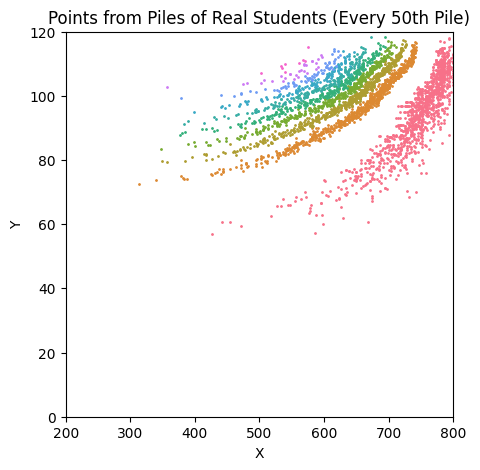

In [36]:
palette = sns.color_palette("husl", len(piles) // 50 +1)
plt.figure(figsize=(5, 5))
plt.xlim(200, 800)
plt.ylim(0, 120)

# Iterate through the pile of real students and select points from every 50th pile

for i, pile in enumerate(piles[::50]):
    # Get the color for the current pile from the palette
    color = palette[i]
    
    # Iterate through the dataframes in the current pile and plot their points
    for df in pile:
        # Plot the points from the current dataframe
        plt.scatter(df[0], df[1], color=color, s=1)
        

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points from Piles of Real Students (Every 50th Pile)')

plt.savefig("plots/png/RSK_piles_distribution.png") # save as png
plt.savefig("plots/pdf/RSK_piles_distribution.pdf") # save as pdf

# Show plot
plt.show()